In [1]:
import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import io
for data_name in ["mnist", "spam", "cifar10"]:
    data = io.loadmat("data/%s_data.mat" % data_name)
    print("\nloaded %s data!" % data_name)
    fields = "test_data", "training_data", "training_labels"
    for field in fields:
        print(field, data[field].shape)


loaded mnist data!
test_data (10000, 784)
training_data (60000, 784)
training_labels (60000, 1)

loaded spam data!
test_data (5857, 32)
training_data (5172, 32)
training_labels (5172, 1)

loaded cifar10 data!
test_data (10000, 3072)
training_data (50000, 3072)
training_labels (50000, 1)


In [2]:
from sklearn.utils import shuffle
#mnist
mnist_data = io.loadmat("data/mnist_data.mat")
shuffled_data,shuffled_labels = shuffle(mnist_data['training_data'],mnist_data['training_labels'])
validation_data = shuffled_data[:10000]
validation_labels = shuffled_labels[:10000]
shuffled_data = shuffled_data[10000:]
shuffled_labels = shuffled_labels[10000:]

In [3]:
#spam
spam_data = io.loadmat("data/spam_data.mat")
shuffled_spam_data,shuffled_spam_labels = shuffle(spam_data['training_data'],spam_data['training_labels'])
length = round(shuffled_spam_data.shape[0]*.2)
validation_spam_data = shuffled_spam_data[:length]
validation_spam_labels = shuffled_spam_labels[:length]
shuffled_spam_data = shuffled_spam_data[length:]
shuffled_spam_labels = shuffled_spam_labels[length:]

In [4]:
#cifar10
cifar10_data = io.loadmat("data/cifar10_data.mat")
shuffled_cifar10_data,shuffled_cifar10_labels = shuffle(cifar10_data['training_data'],cifar10_data['training_labels'])
validation_cifar10_data = shuffled_cifar10_data[:5000]
validation_cifar10_labels = shuffled_cifar10_labels[:5000]
shuffled_cifar10_data = shuffled_cifar10_data[5000:]
shuffled_cifar10_labels = shuffled_cifar10_labels[5000:]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7742
0.818
0.8594
0.886
0.895
0.9012
0.9106


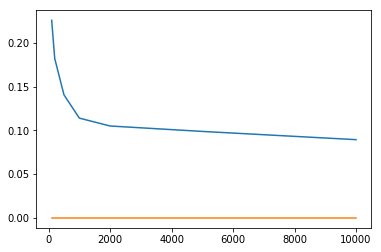

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
mnist_errors = []
mnist_train_errors = []
for i in [100, 200, 500, 1000, 2000, 5000, 10000]:
    data = shuffled_data[:i]
    labels = shuffled_labels[:i]
    mnist_clf = SVC(kernel = 'linear')
    mnist_clf.fit(data, labels)
    mnist_pred = mnist_clf.predict(validation_data)
    mnist_train_pred = mnist_clf.predict(data)
    mnist_score = accuracy_score(validation_labels, mnist_pred)
    mnist_train_score = accuracy_score(labels, mnist_train_pred)
    mnist_errors += [1-mnist_score]
    mnist_train_errors += [1-mnist_train_score]
    print(mnist_score)
plt.plot([100, 200, 500, 1000, 2000, 5000, 10000],mnist_errors)
plt.plot([100, 200, 500, 1000, 2000, 5000, 10000], mnist_train_errors)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7949709864603481
0.804642166344294
0.8075435203094777
0.8133462282398453
0.809477756286267
0.811411992263056


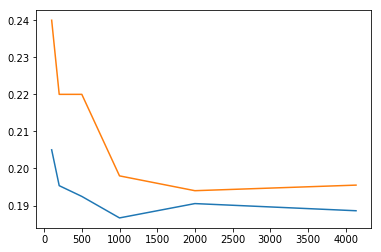

In [26]:
spam_errors = []
spam_train_errors = []
for i in [100, 200, 500, 1000, 2000,len(shuffled_spam_data)]:
    data = shuffled_spam_data[:i]
    labels = shuffled_spam_labels[:i]
    spam_clf = SVC(kernel = 'linear')
    spam_clf.fit(data, labels)
    spam_pred = spam_clf.predict(validation_spam_data)
    spam_train_pred = spam_clf.predict(data)
    spam_score = accuracy_score(validation_spam_labels, spam_pred)
    spam_train_score = accuracy_score(labels, spam_train_pred)
    spam_errors += [1-spam_score]
    spam_train_errors += [1-spam_train_score]
    print(spam_score)
plt.plot([100, 200, 500, 1000, 2000,len(shuffled_spam_data)],spam_errors)
plt.plot([100, 200, 500, 1000, 2000,len(shuffled_spam_data)],spam_train_errors)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2286
0.26
0.2878
0.3026
0.3024
0.3026


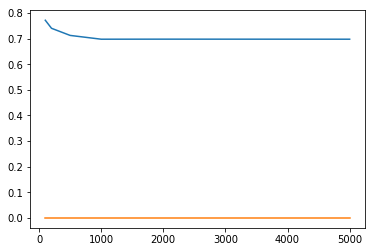

In [27]:
cifar10_errors = []
cifar10_train_errors=[]
for i in [100, 200, 500, 1000, 2000, 5000]:
    data = shuffled_cifar10_data[:i]
    labels = shuffled_cifar10_labels[:i]
    cifar10_clf = SVC(kernel = 'linear')
    cifar10_clf.fit(data, labels)
    cifar10_pred = cifar10_clf.predict(validation_cifar10_data)
    cifar10_train_pred = cifar10_clf.predict(data)
    cifar10_score = accuracy_score(validation_cifar10_labels, cifar10_pred)
    cifar10_train_score = accuracy_score(labels, cifar10_train_pred)
    cifar10_errors += [1-cifar10_score]
    cifar10_train_errors += [1-cifar10_train_score]
    print(cifar10_score)
plt.plot([100, 200, 500, 1000, 2000, 5000],cifar10_errors)
plt.plot([100, 200, 500, 1000, 2000, 5000],cifar10_train_errors)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9151
0.9151
0.9151
0.9151
0.9151
0.9151
0.9151
0.9151


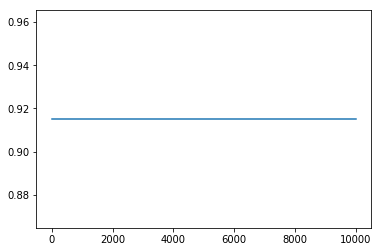

In [8]:
mnist_scores1 = []
for i in [10**-4, 10**-3, 10**-2, 10**-1, 10, 100, 1000, 10000]:
    data = shuffled_data[:10000]
    labels = shuffled_labels[:10000]
    mnist_clf = SVC(kernel = 'linear', C = i)
    mnist_clf = mnist_clf.fit(data, labels)
    mnist_pred = mnist_clf.predict(validation_data)
    mnist_score = accuracy_score(validation_labels, mnist_pred)
    mnist_scores1 += [mnist_score]
    print(mnist_score)
plt.plot([10**-4, 10**-3, 10**-2, 10**-1, 10, 100, 1000, 10000],mnist_scores1)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.1116
0.8932
0.9332
0.9151
0.9151
0.9151
0.9151
0.9151


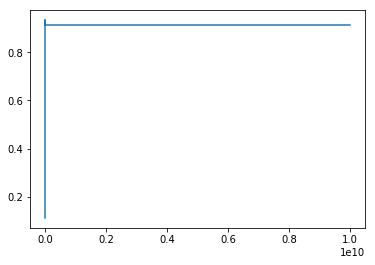

In [9]:
mnist_scores2 = []
for i in [10**-10, 10**-8, 10**-6, 10**-4, 10**4, 10**6, 10**8, 10**10]:
    data = shuffled_data[:10000]
    labels = shuffled_labels[:10000]
    mnist_clf = SVC(kernel = 'linear', C = i)
    mnist_clf = mnist_clf.fit(data, labels)
    mnist_pred = mnist_clf.predict(validation_data)
    mnist_score = accuracy_score(validation_labels, mnist_pred)
    mnist_scores2 += [mnist_score]
    print(mnist_score)
plt.plot([-10**-10, -10**-8, -10**-6, -10**-4, 10**4, 10**6, 10**8, 10**10],mnist_scores2)
plt.show()

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
spam_data = io.loadmat("data/spam_data.mat")
shuffled_spam_data,shuffled_spam_labels = shuffle(spam_data['training_data'],spam_data['training_labels'])
data1, data2, data3, data4, data5 = np.array_split(shuffled_spam_data,5)
label1, label2, label3, label4, label5 = np.array_split(shuffled_spam_labels,5)




spam_errors = []
for i in [10**-10, 10**-8, 10**-6, 10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2]:
    spam_scores = []
    for j in np.arange(5):
        datas=[data1,data2,data3,data4,data5]
        labels = [label1,label2,label3,label4,label5]
        validation_data = datas[j]
        validation_labels = labels[j]
        labels.pop(j)
        datas.pop(j)
        training_data = np.concatenate(datas)
        training_labels = np.concatenate(labels)
        spam_clf = SVC(kernel = 'linear',C = i)
        spam_clf = spam_clf.fit(training_data, training_labels)
        spam_pred = spam_clf.predict(validation_data)
        spam_score = accuracy_score(validation_labels, spam_pred)
        spam_scores += [spam_score]
        print(spam_score)
    print("validation score of C = ", i, " is ", np.average(spam_scores))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7227053140096619
0.7111111111111111
0.7040618955512572
0.7156673114119922
0.6963249516441006
validation score of C =  1e-10  is  0.7099741167456245
0.7227053140096619
0.7111111111111111
0.7040618955512572
0.7156673114119922
0.6963249516441006
validation score of C =  1e-08  is  0.7099741167456245
0.7227053140096619
0.7111111111111111
0.7040618955512572
0.7156673114119922
0.6963249516441006
validation score of C =  1e-06  is  0.7099741167456245
0.7323671497584541
0.714975845410628
0.7108317214700194
0.7224371373307543
0.7040618955512572
validation score of C =  0.0001  is  0.7169347499042227
0.7574879227053141
0.7545893719806763
0.7456479690522244
0.7620889748549323
0.7398452611218569
validation score of C =  0.001  is  0.7519318999430008
0.7758454106280194
0.782608695652174
0.7804642166344294
0.7911025145067698
0.7640232108317214
validation score of C =  0.01  is  0.7788088096506228
0.8038647342995169
0.7942028985507247
0.7862669245647969
0.8075435203094777
0.7794970986460348
validat

In [6]:
# A code snippet to help you save your results into a kaggle accepted csv
import pandas as pd
import numpy as np

# Usage results_to_csv(clf.predict(X_test))
def results_to_csv(y_test,name):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1. 
    df.to_csv('%ssubmission.csv' % name, index_label='Id')

In [36]:
data = shuffled_data
labels = shuffled_labels
mnist_clf = SVC(kernel = 'linear', C = 10**-6)
mnist_clf.fit(data, labels)
mnist_pred = mnist_clf.predict(mnist_data['test_data'])
results_to_csv(mnist_pred,"mnist")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
from sklearn.svm import SVC
data = shuffled_spam_data[:2000]
labels = shuffled_spam_labels[:2000]
spam_clf = SVC(kernel = 'linear')
spam_clf.fit(data, labels)
spam_pred = spam_clf.predict(spam_data['test_data'])
results_to_csv(spam_pred,"spam")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
from sklearn.svm import SVC
data = shuffled_cifar10_data[:2000]
labels = shuffled_cifar10_labels[:2000]
cifar10_clf = SVC(kernel = 'linear', C = 10**-6)
cifar10_clf.fit(data, labels)
cifar10_pred = cifar10_clf.predict(cifar10_data['test_data'])
results_to_csv(cifar10_pred,"cifar10")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
